<a href="https://colab.research.google.com/github/L-Poca/DS_COVID/blob/copilot%2Fdata-viz-exploratory-analysis-again/notebooks/Complete_EDA_COVID_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complete Exploratory Data Analysis - COVID-19 Radiography Dataset

This notebook performs a comprehensive exploratory data analysis on the COVID-19 radiography dataset including:

- Data loading and validation
- Basic visualizations (distributions, samples)
- Deep learning embeddings extraction (ResNet50)
- Dimensionality reduction (PCA, UMAP, t-SNE)
- Clustering analysis (KMeans, DBSCAN)
- Advanced visualizations (Grad-CAM, similarity matrices)

**Important**: This notebook is designed to work both locally and on Google Colab with GPU support.

## 1. Setup and Installation

In [1]:
# Check if running on Colab
import os
import sys

IN_COLAB = 'google.colab' in sys.modules
print(f"Running on Colab: {IN_COLAB}")

if IN_COLAB:
    print("Colab environment detected")
else:
    print("Local environment detected")

Running on Colab: True
Colab environment detected


In [2]:
!rm -rf /content/DS_COVID/
!rm -rf /content/data/

In [3]:
if IN_COLAB:
    from google.colab import drive
    import zipfile
    drive.mount('/content/drive')
    # !mkdir /content/DS_COVID/
            # Dézipper
    with zipfile.ZipFile('/content/drive/MyDrive/archive_covid.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/data/raw/COVID-19_Radiography_Dataset/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Mount Google Drive (Colab only)
if IN_COLAB:


    # Clone repository or navigate to it
    !mkdir -p /content/DS_COVID
    REPO_PATH = '/content/DS_COVID'

    print("Cloning repository...")
    !git clone https://github.com/L-Poca/DS_COVID.git {REPO_PATH}
    !git checkout copilot/data-viz-exploratory-analysis-again
    print("Checking out branch...")
    !git -C {REPO_PATH} checkout copilot/data-viz-exploratory-analysis-again


    os.chdir(REPO_PATH)

    sys.path.insert(0, REPO_PATH)





    # Set data paths (adjust these for your Drive structure)
    BASE_PATH = '/content/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'
    METADATA_PATH = f'{REPO_PATH}/metadata'
    OUTPUT_DIR = '/content/drive/MyDrive/DS_COVID/outputs'
else:
    # Local paths
    REPO_PATH = os.path.abspath('..')
    sys.path.insert(0, REPO_PATH)

    BASE_PATH = 'data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'
    METADATA_PATH = 'metadata'
    OUTPUT_DIR = 'outputs'

print(f"Repository path: {REPO_PATH}")
print(f"Base path: {BASE_PATH}")
print(f"Metadata path: {METADATA_PATH}")
print(f"Output dir: {OUTPUT_DIR}")

Cloning repository...
Cloning into '/content/DS_COVID'...
remote: Enumerating objects: 1010, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 1010 (delta 79), reused 93 (delta 61), pack-reused 880 (from 1)
Receiving objects: 100% (1010/1010), 62.44 MiB | 16.98 MiB/s, done.
Resolving deltas: 100% (502/502), done.
fatal: not a git repository (or any of the parent directories): .git
Checking out branch...
Branch 'copilot/data-viz-exploratory-analysis-again' set up to track remote branch 'copilot/data-viz-exploratory-analysis-again' from 'origin'.
Switched to a new branch 'copilot/data-viz-exploratory-analysis-again'
Repository path: /content/DS_COVID
Base path: /content/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset
Metadata path: /content/DS_COVID/metadata
Output dir: /content/drive/MyDrive/DS_COVID/outputs


In [5]:
# Install dependencies
if IN_COLAB:
    print("Installing Colab dependencies...")
    !pip install -q -r {REPO_PATH}/requirements-colab.txt
else:
    print("Installing local dependencies...")
    !pip install -q -r requirements.txt

print("Dependencies installed!")

Installing Colab dependencies...
Dependencies installed!


In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)

print("All imports successful!")

All imports successful!


## 2. Run Complete EDA Pipeline

This section runs the complete automated pipeline that performs all analysis steps.

In [7]:
# Verify paths exist
base_path_obj = Path(BASE_PATH)
metadata_path_obj = Path(METADATA_PATH)

print(f"Base path exists: {base_path_obj.exists()}")
print(f"Metadata path exists: {metadata_path_obj.exists()}")

if base_path_obj.exists():
    print(f"\nContents of base path:")
    for item in base_path_obj.iterdir():
        print(f"  - {item.name}")
else:
    print(f"\nWARNING: Base path does not exist: {BASE_PATH}")
    print("Please adjust BASE_PATH in the cell above to point to your dataset.")

if metadata_path_obj.exists():
    print(f"\nMetadata files:")
    for item in metadata_path_obj.glob("*.xlsx"):
        print(f"  - {item.name}")
else:
    print(f"\nWARNING: Metadata path does not exist: {METADATA_PATH}")

Base path exists: True
Metadata path exists: True

Contents of base path:
  - README.md.txt
  - Lung_Opacity
  - Normal
  - COVID
  - Viral Pneumonia
  - Viral Pneumonia.metadata.xlsx
  - Lung_Opacity.metadata.xlsx
  - Normal.metadata.xlsx
  - COVID.metadata.xlsx

Metadata files:
  - Viral Pneumonia.metadata.xlsx
  - Lung_Opacity.metadata.xlsx
  - Normal.metadata.xlsx
  - COVID.metadata.xlsx


In [9]:
# Import and run pipeline
from src.explorationdata.pipeline.pipeline_runner import EDAPipeline

# Configure pipeline
MAX_IMAGES_PER_CLASS = None  # Set to a number for testing (e.g., 100), None for full dataset
DEVICE = None  # Auto-detect (will use CUDA if available)

print("Initializing EDA pipeline...")
pipeline = EDAPipeline(
    base_path=BASE_PATH,
    metadata_path=METADATA_PATH,
    output_dir=OUTPUT_DIR,
    seed=SEED,
    device=DEVICE,
    max_images_per_class=MAX_IMAGES_PER_CLASS
)

print("\nRunning full pipeline...")
print("This may take 20+ minutes depending on dataset size and hardware.")
print("Progress will be logged below.\n")

success = pipeline.run_full_pipeline()

if success:
    print("\n" + "="*60)
    print("✓ Pipeline completed successfully!")
    print(f"✓ Results saved to: {pipeline.output_dir}")
    print("="*60)
else:
    print("\n" + "="*60)
    print("✗ Pipeline failed. Check logs for details.")
    print(f"✗ Partial results may be in: {pipeline.output_dir}")
    print("="*60)

2025-10-22 18:26:18,466 - EDA_Pipeline - INFO - ============================================================
2025-10-22 18:26:18,466 - EDA_Pipeline - INFO - ============================================================
INFO:EDA_Pipeline:============================================================
2025-10-22 18:26:18,469 - EDA_Pipeline - INFO - STEP 1: Data Loading and Validation
2025-10-22 18:26:18,469 - EDA_Pipeline - INFO - STEP 1: Data Loading and Validation
INFO:EDA_Pipeline:STEP 1: Data Loading and Validation
2025-10-22 18:26:18,471 - EDA_Pipeline - INFO - ============================================================
2025-10-22 18:26:18,471 - EDA_Pipeline - INFO - ============================================================
INFO:EDA_Pipeline:============================================================
2025-10-22 18:26:18,473 - EDA_Pipeline - INFO - Starting to load dataset...
2025-10-22 18:26:18,473 - EDA_Pipeline - INFO - Starting to load dataset...
INFO:EDA_Pipeline:Starting to lo

Initializing EDA pipeline...

Running full pipeline...
This may take 20+ minutes depending on dataset size and hardware.
Progress will be logged below.



Loading COVID: 100%|██████████| 3616/3616 [00:19<00:00, 183.29it/s]
2025-10-22 18:26:38,322 - EDA_Pipeline - INFO - Loading 6012 images from Lung_Opacity
2025-10-22 18:26:38,322 - EDA_Pipeline - INFO - Loading 6012 images from Lung_Opacity
INFO:EDA_Pipeline:Loading 6012 images from Lung_Opacity
Loading Lung_Opacity: 100%|██████████| 6012/6012 [00:32<00:00, 186.42it/s]
2025-10-22 18:27:10,695 - EDA_Pipeline - INFO - Loading 10192 images from Normal
2025-10-22 18:27:10,695 - EDA_Pipeline - INFO - Loading 10192 images from Normal
INFO:EDA_Pipeline:Loading 10192 images from Normal
Loading Normal: 100%|██████████| 10192/10192 [00:55<00:00, 184.60it/s]
2025-10-22 18:28:05,934 - EDA_Pipeline - INFO - Loading 1345 images from Viral Pneumonia
2025-10-22 18:28:05,934 - EDA_Pipeline - INFO - Loading 1345 images from Viral Pneumonia
INFO:EDA_Pipeline:Loading 1345 images from Viral Pneumonia
Loading Viral Pneumonia: 100%|██████████| 1345/1345 [00:08<00:00, 167.52it/s]
2025-10-22 18:28:14,028 - EDA_


✓ Pipeline completed successfully!
✓ Results saved to: /content/drive/MyDrive/DS_COVID/outputs/20251022_182618


## 3. View Results

Let's examine some of the generated outputs.

In [10]:
# Load summary
import json

summary_path = Path(pipeline.output_dir) / "summary.json"
if summary_path.exists():
    with open(summary_path, 'r') as f:
        summary = json.load(f)

    print("Pipeline Summary:")
    print("="*60)
    print(f"Total images: {summary.get('total_images', 'N/A')}")
    print(f"Corrupted images: {summary.get('corrupted_images', 'N/A')}")
    print(f"Classes: {', '.join(summary.get('classes', []))}")
    print(f"Embedding shape: {summary.get('embedding_shape', 'N/A')}")
    print(f"Total time: {summary.get('total_time_seconds', 0):.2f} seconds")
    print("\nClustering Metrics:")
    if 'kmeans_metrics' in summary:
        km = summary['kmeans_metrics']
        print(f"  KMeans - ARI: {km.get('ari', 0):.3f}, NMI: {km.get('nmi', 0):.3f}")
    if 'dbscan_metrics' in summary:
        db = summary['dbscan_metrics']
        print(f"  DBSCAN - ARI: {db.get('ari', 0):.3f}, NMI: {db.get('nmi', 0):.3f}")
else:
    print("Summary file not found.")

Pipeline Summary:
Total images: 21165
Corrupted images: 0
Classes: COVID, Lung_Opacity, Normal, Viral Pneumonia
Embedding shape: [21165, 2048]
Total time: 459.11 seconds

Clustering Metrics:
  KMeans - ARI: 0.206, NMI: 0.261
  DBSCAN - ARI: 0.001, NMI: 0.002



Figure: class_distribution.png


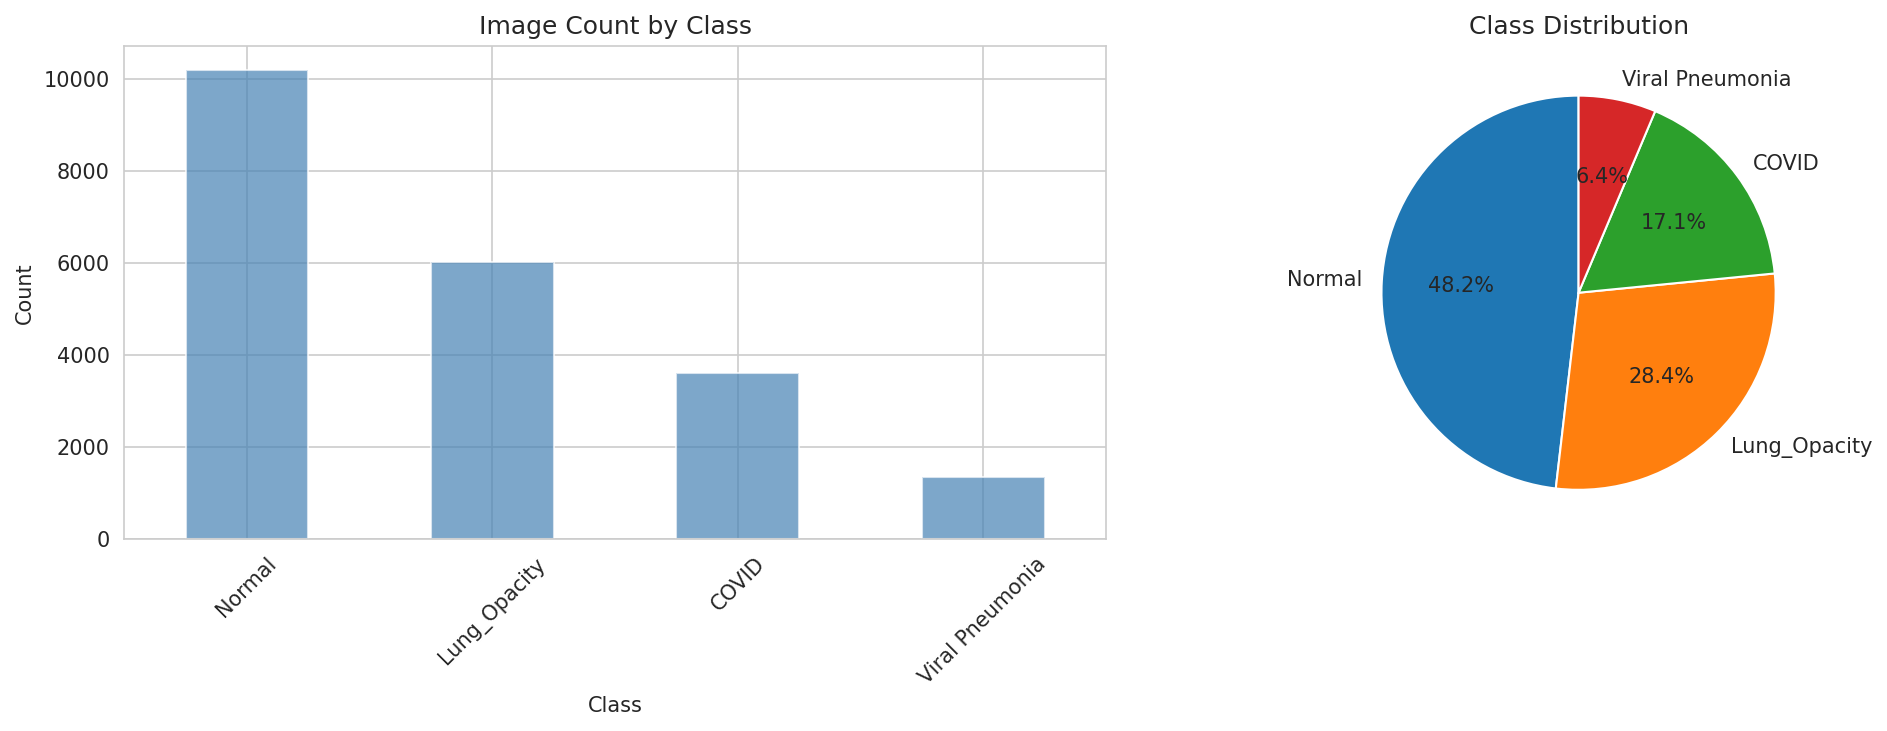


Figure: sample_grid_random.png


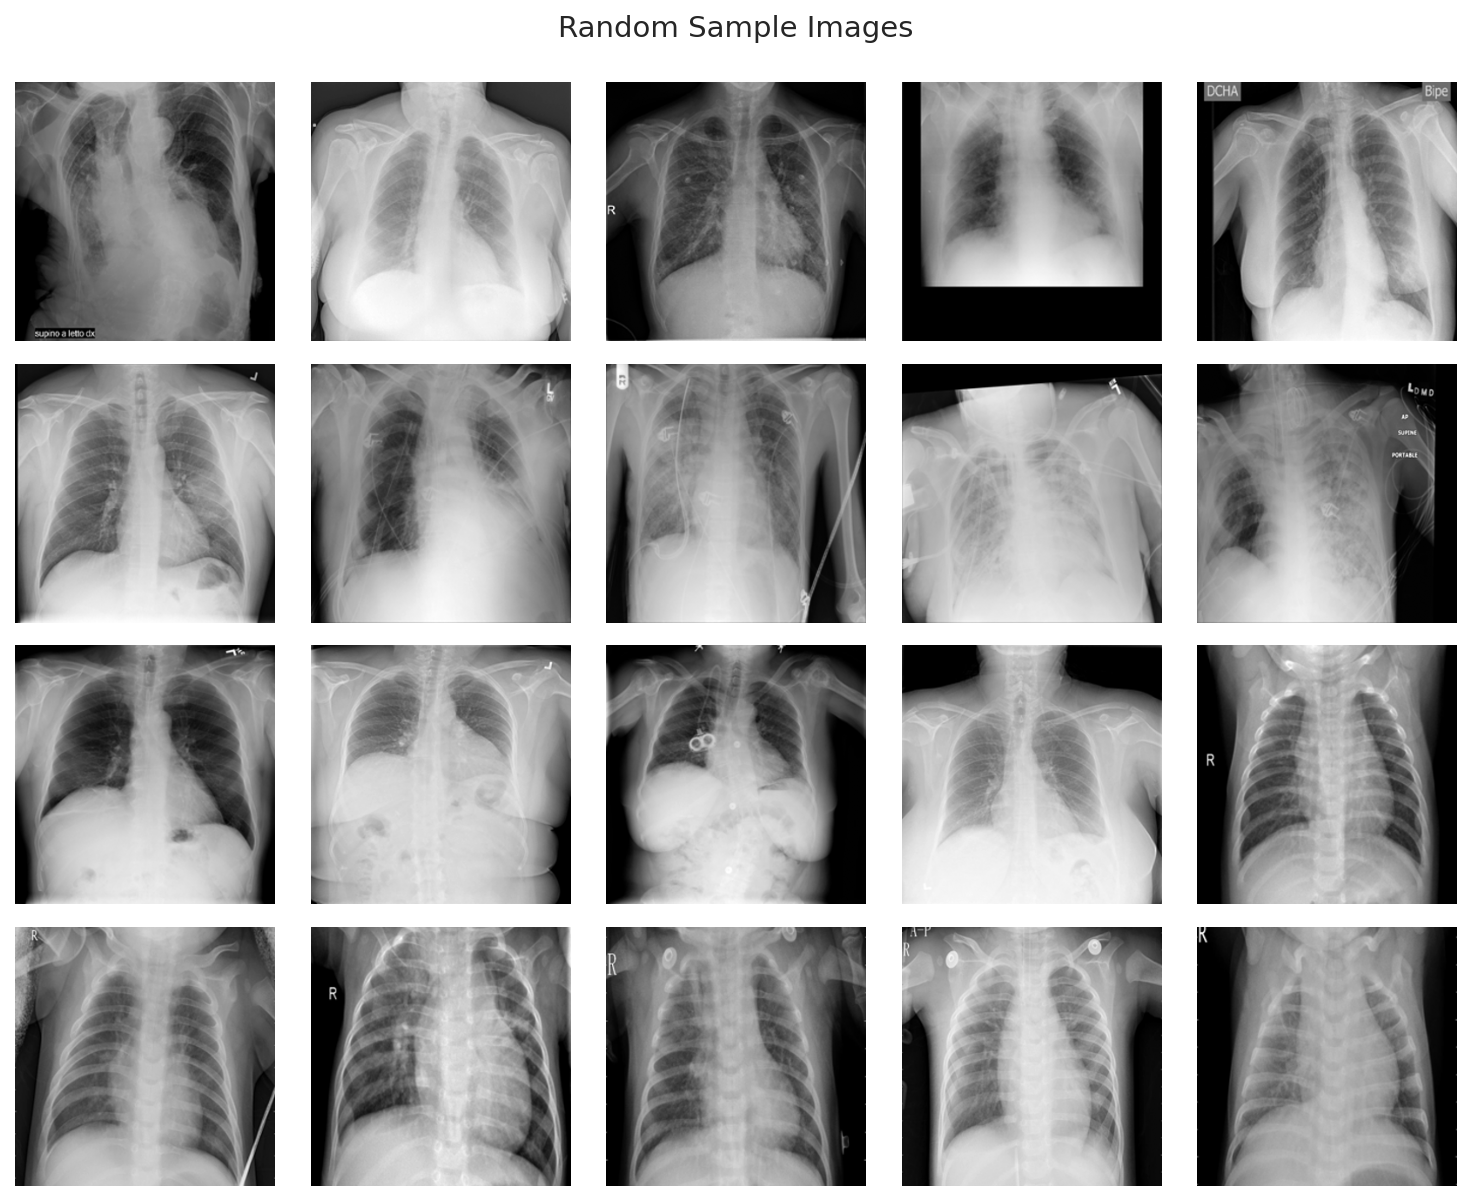


Figure: image_mask_overlays.png


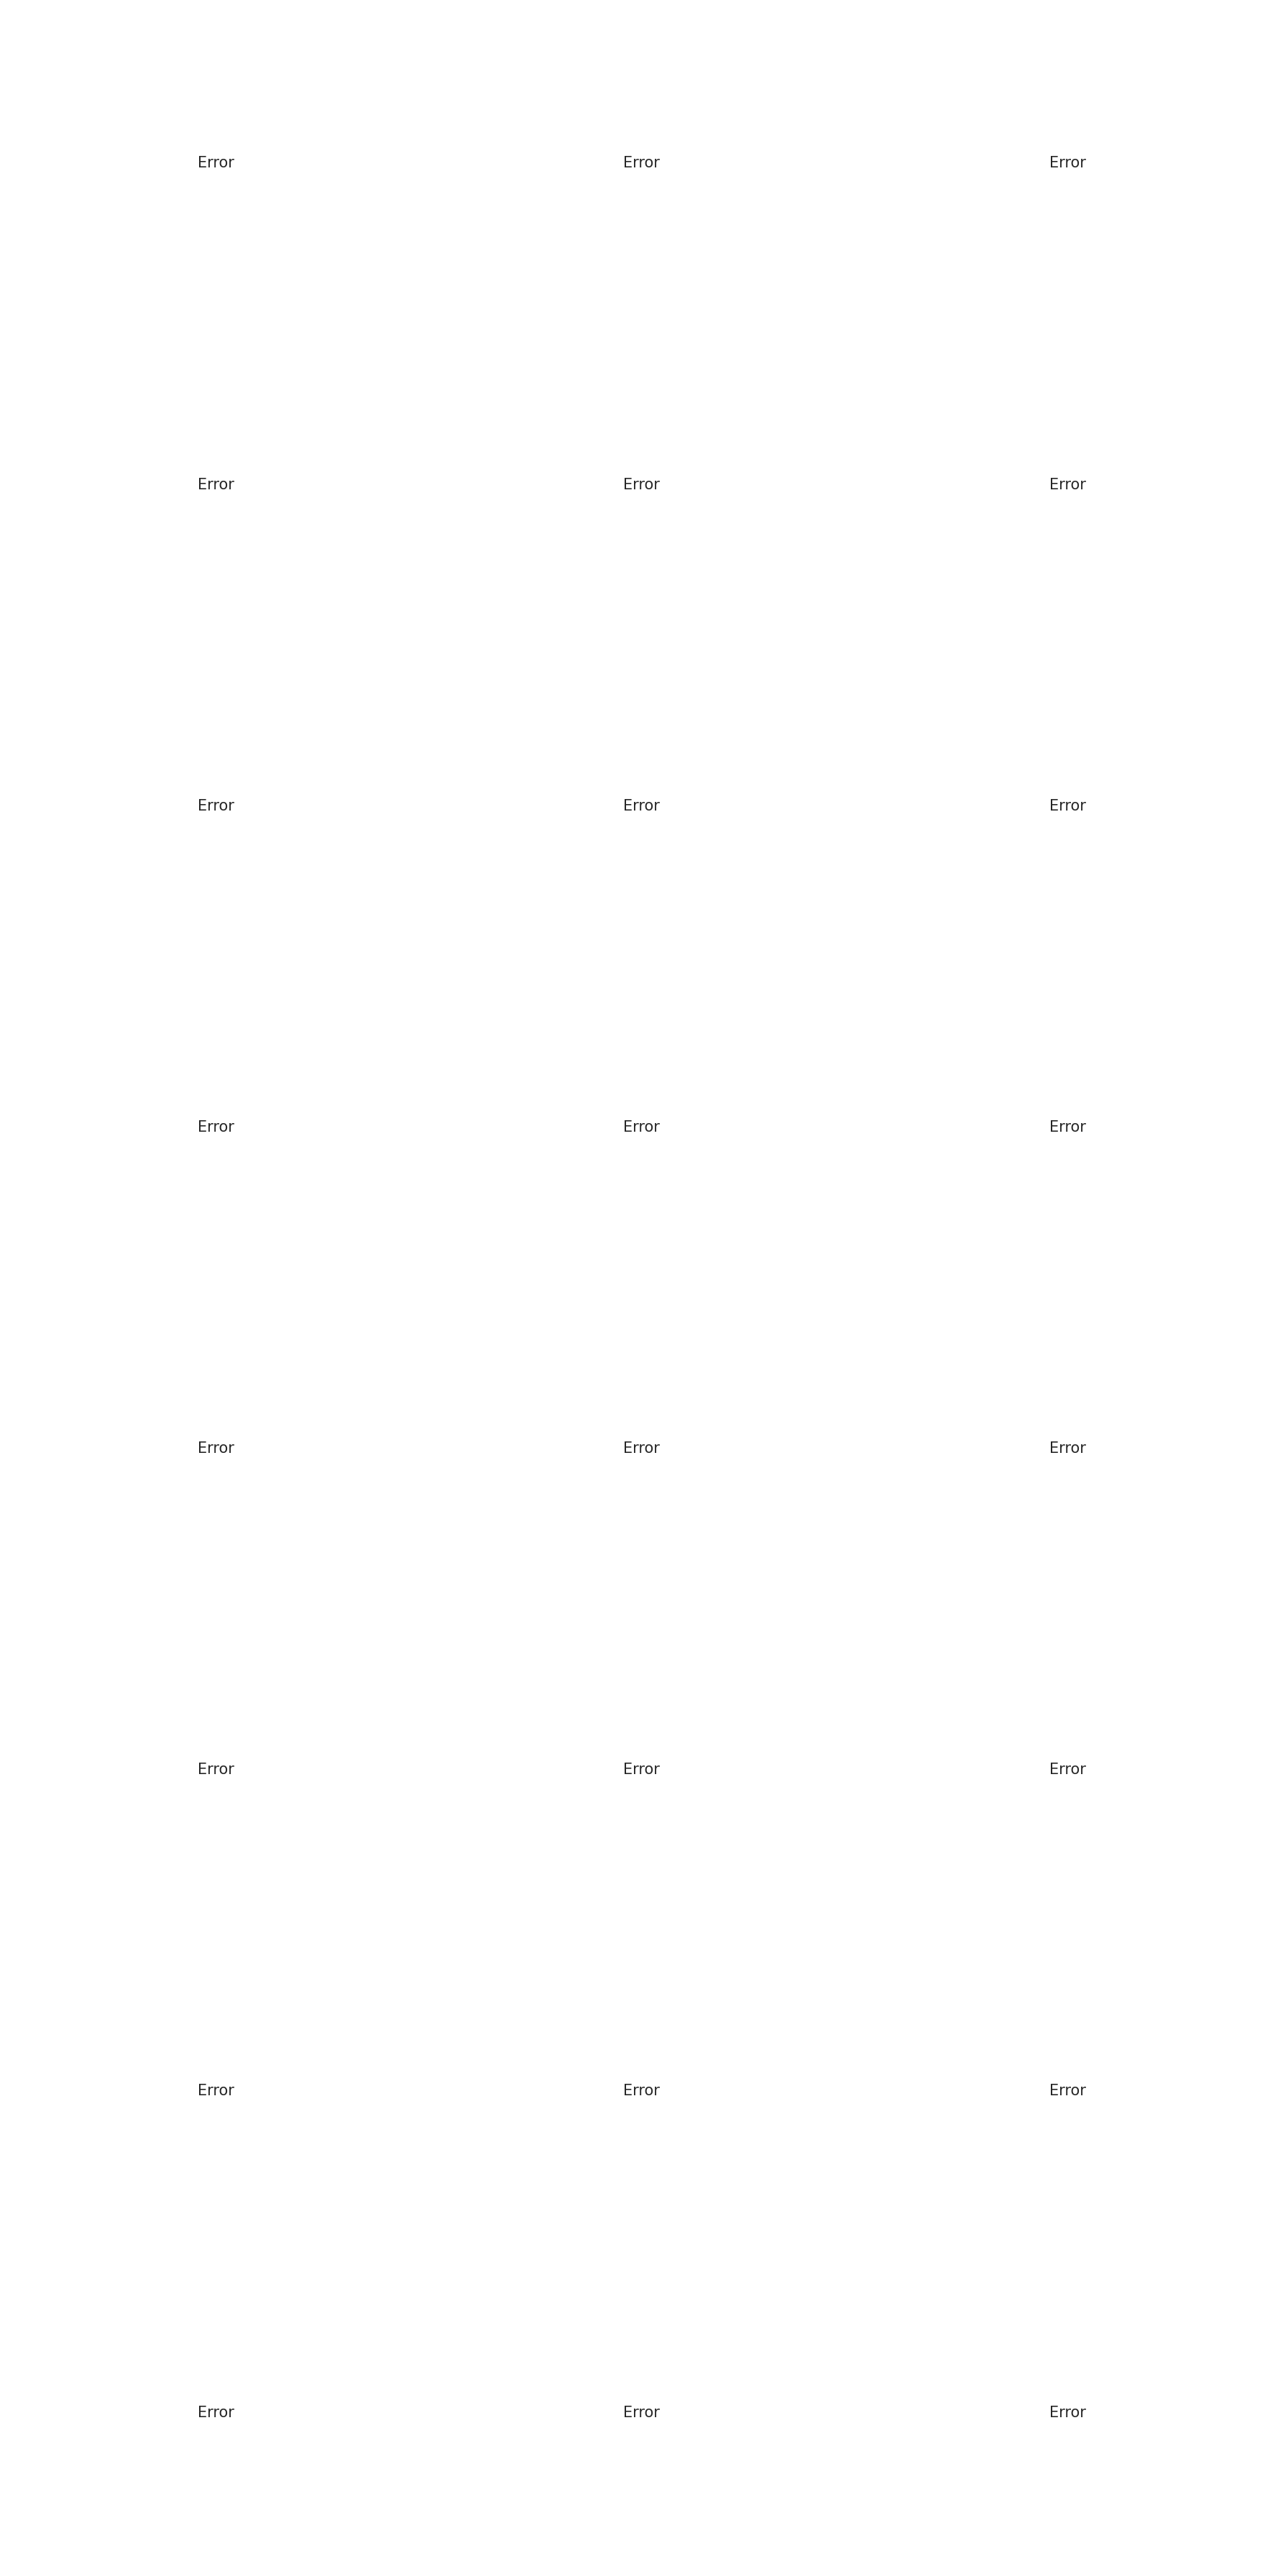


Figure: pca_scree.png


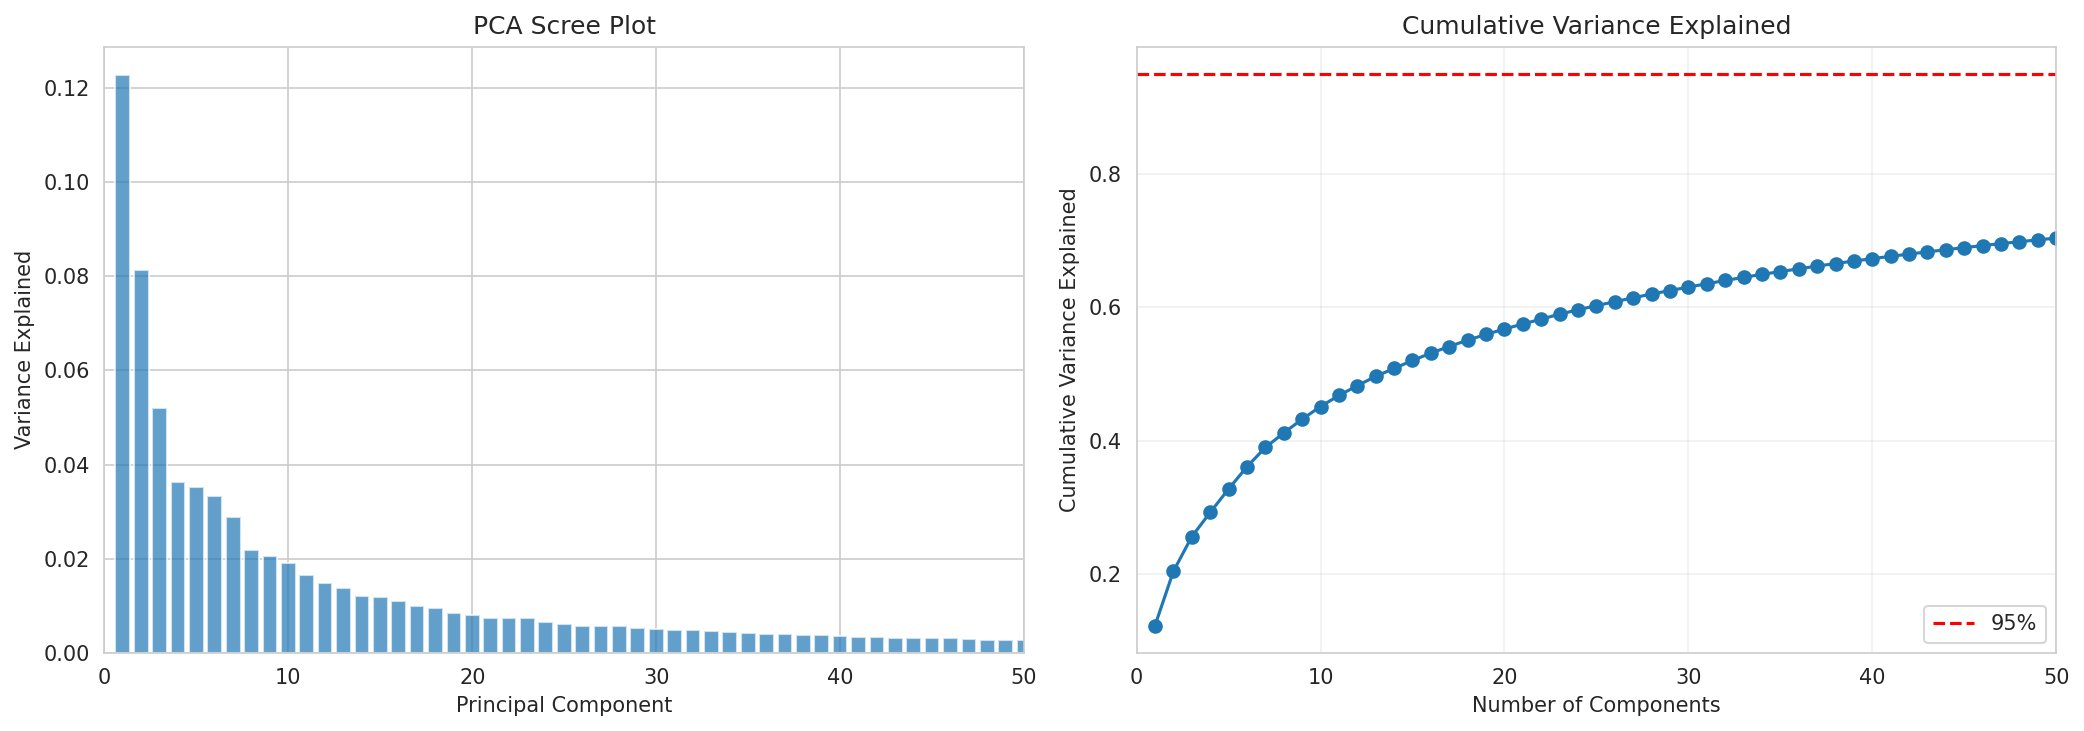


Figure: umap_scatter.png


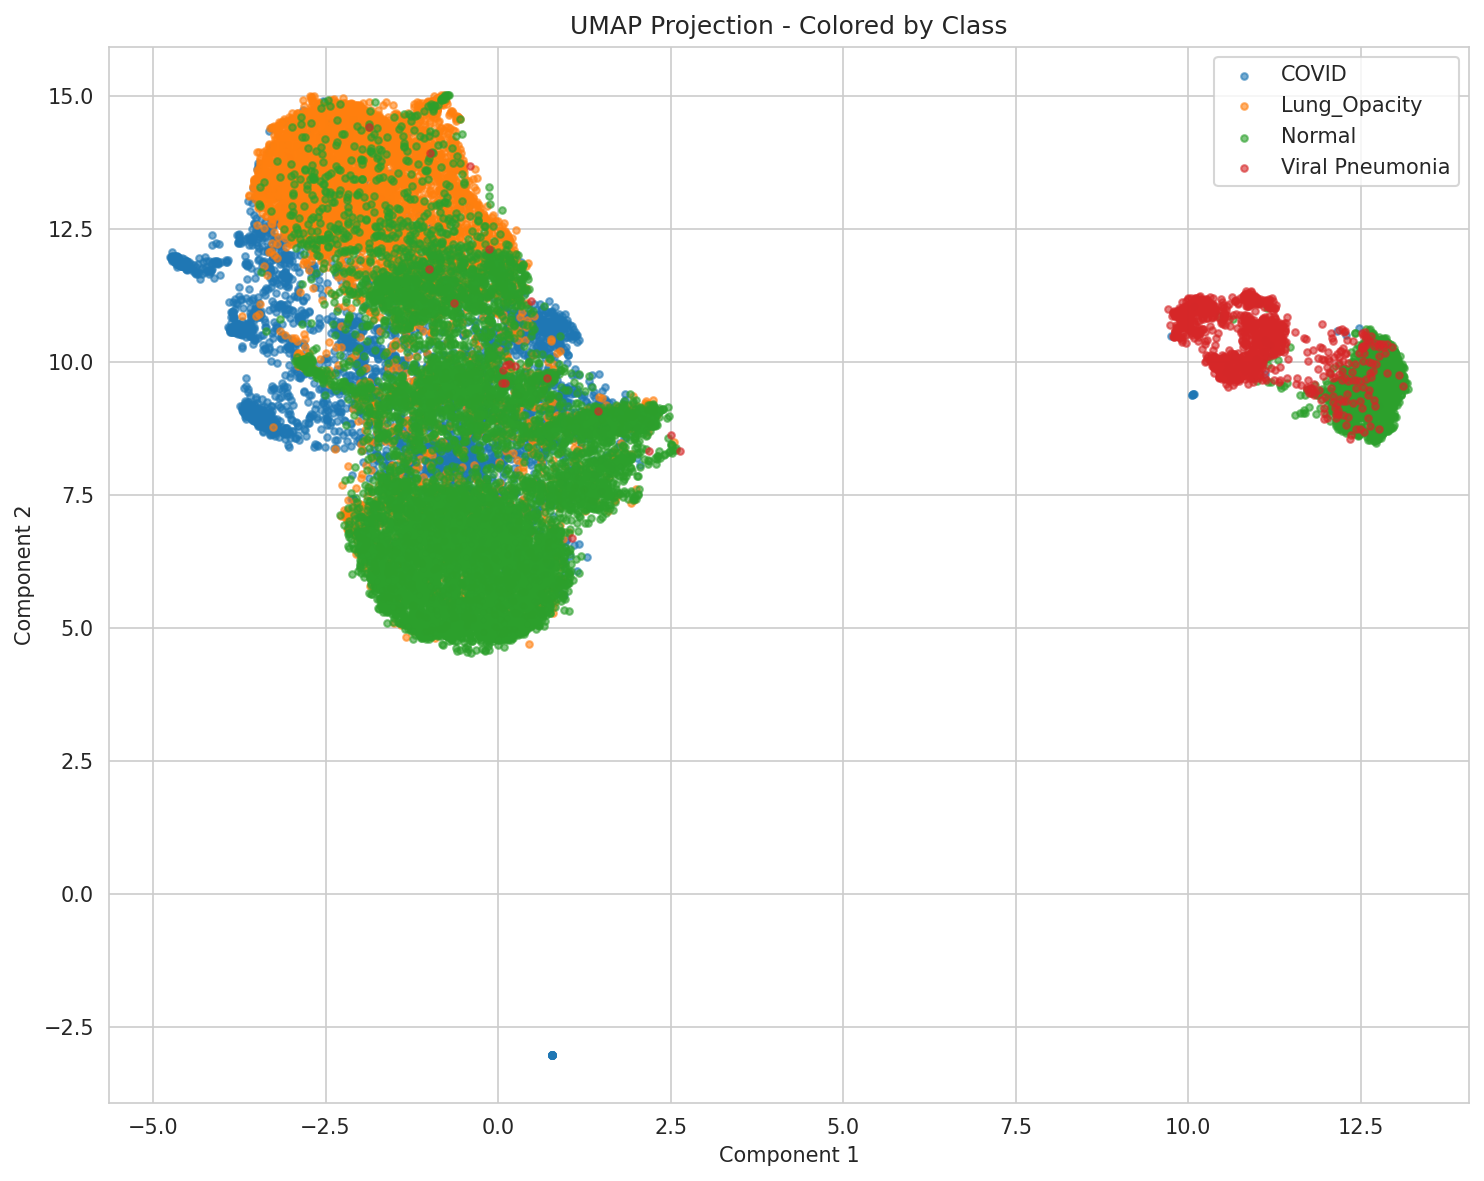


Figure: tsne_scatter.png


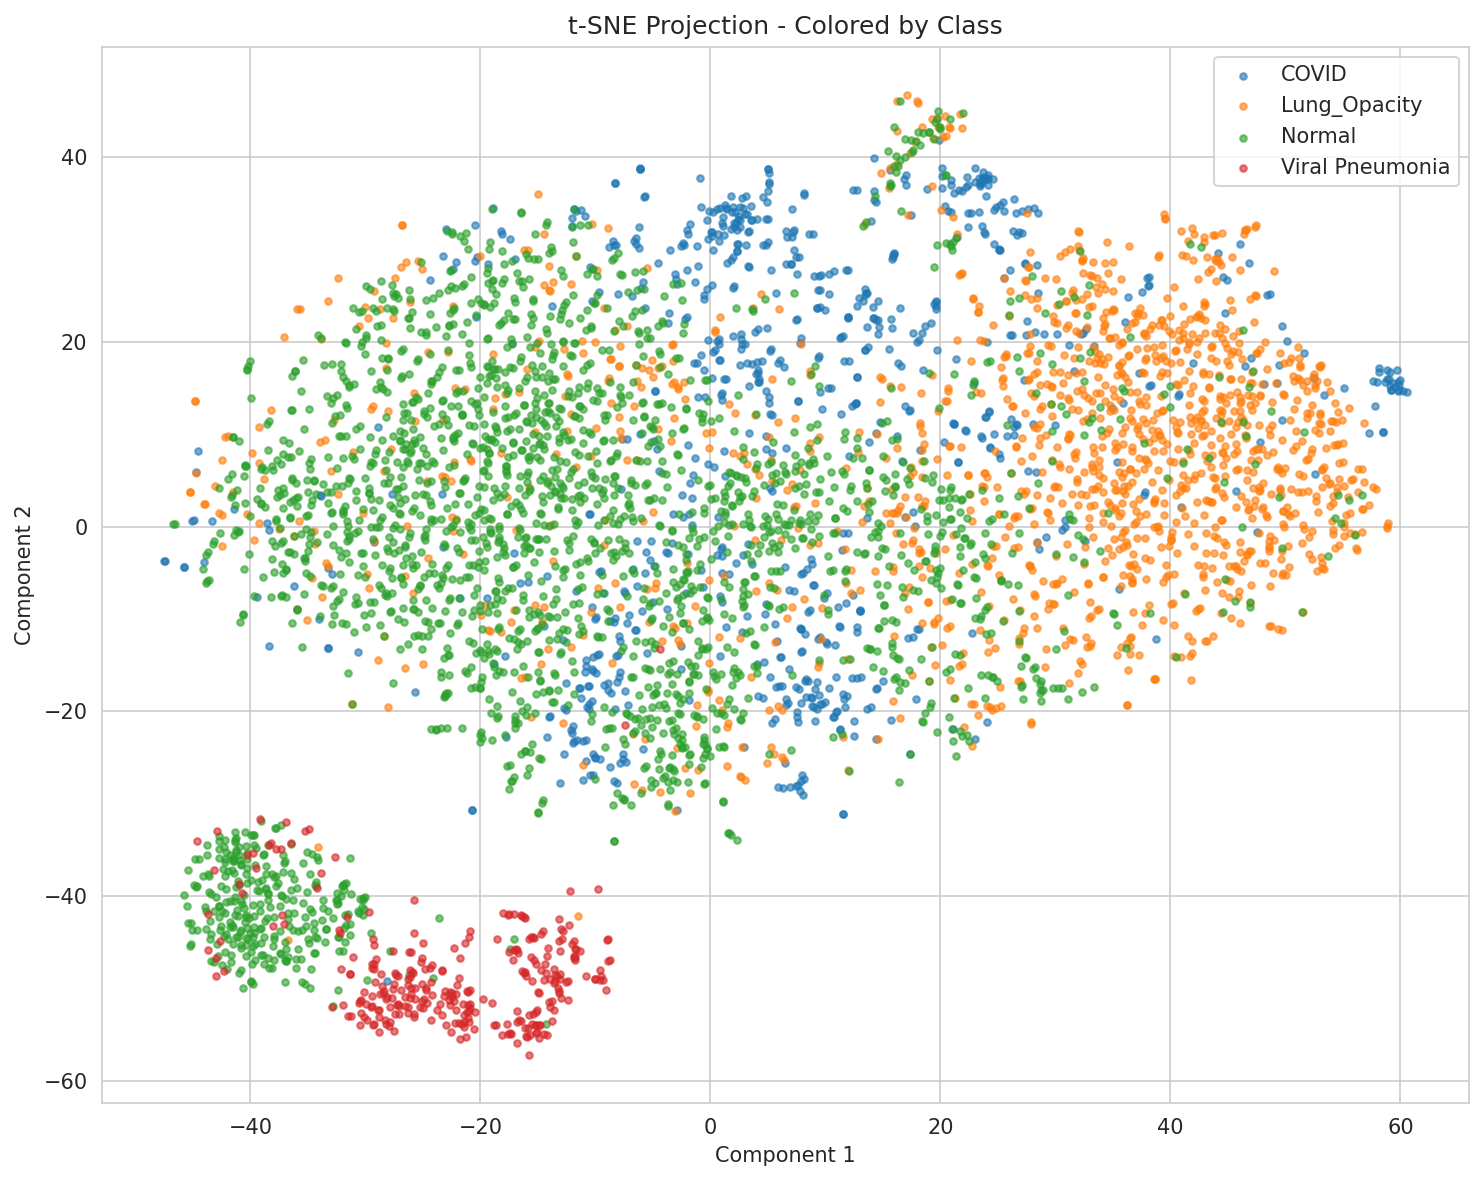


Figure: inter_class_similarity.png


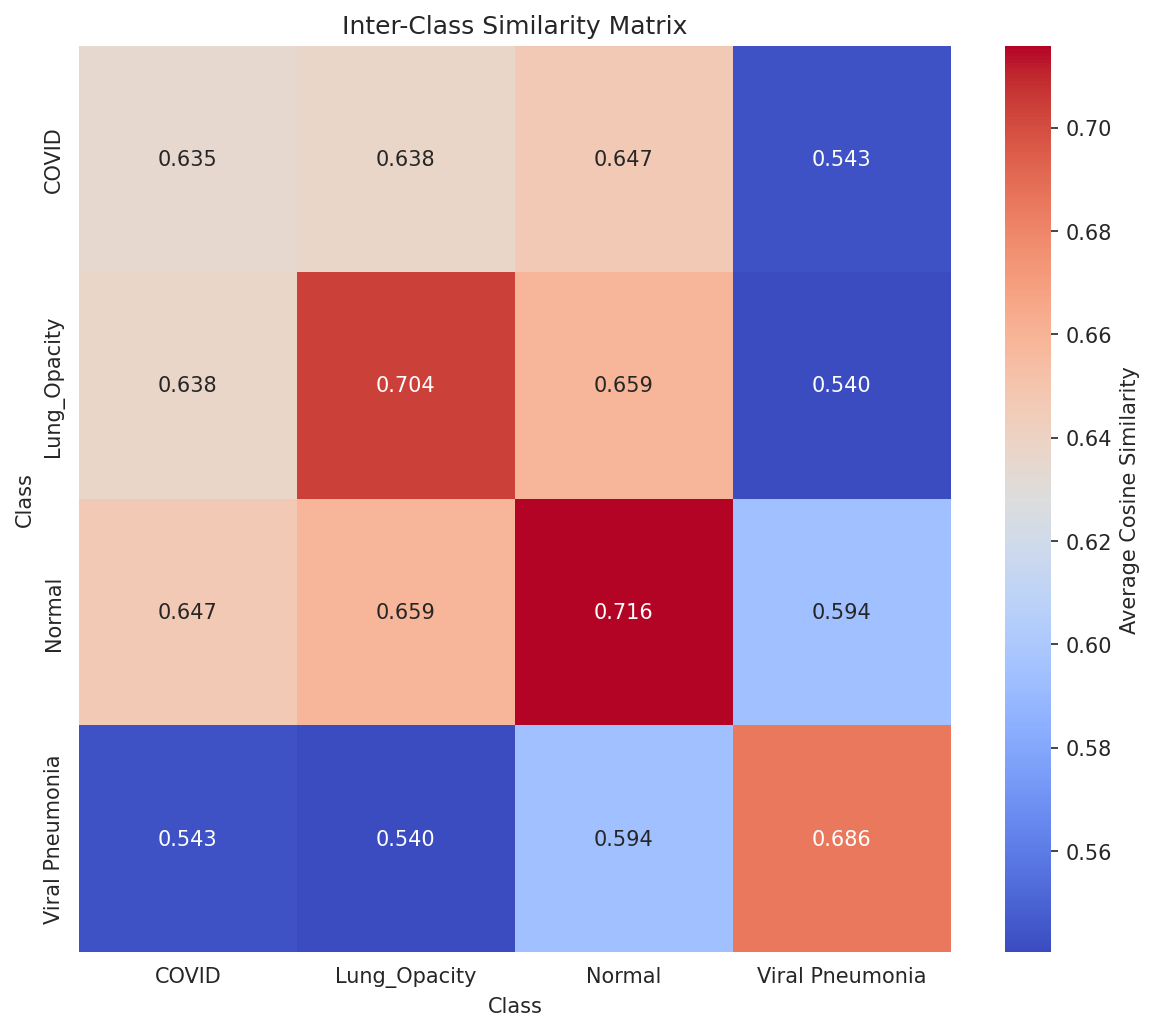


Figure: cluster_representatives.png


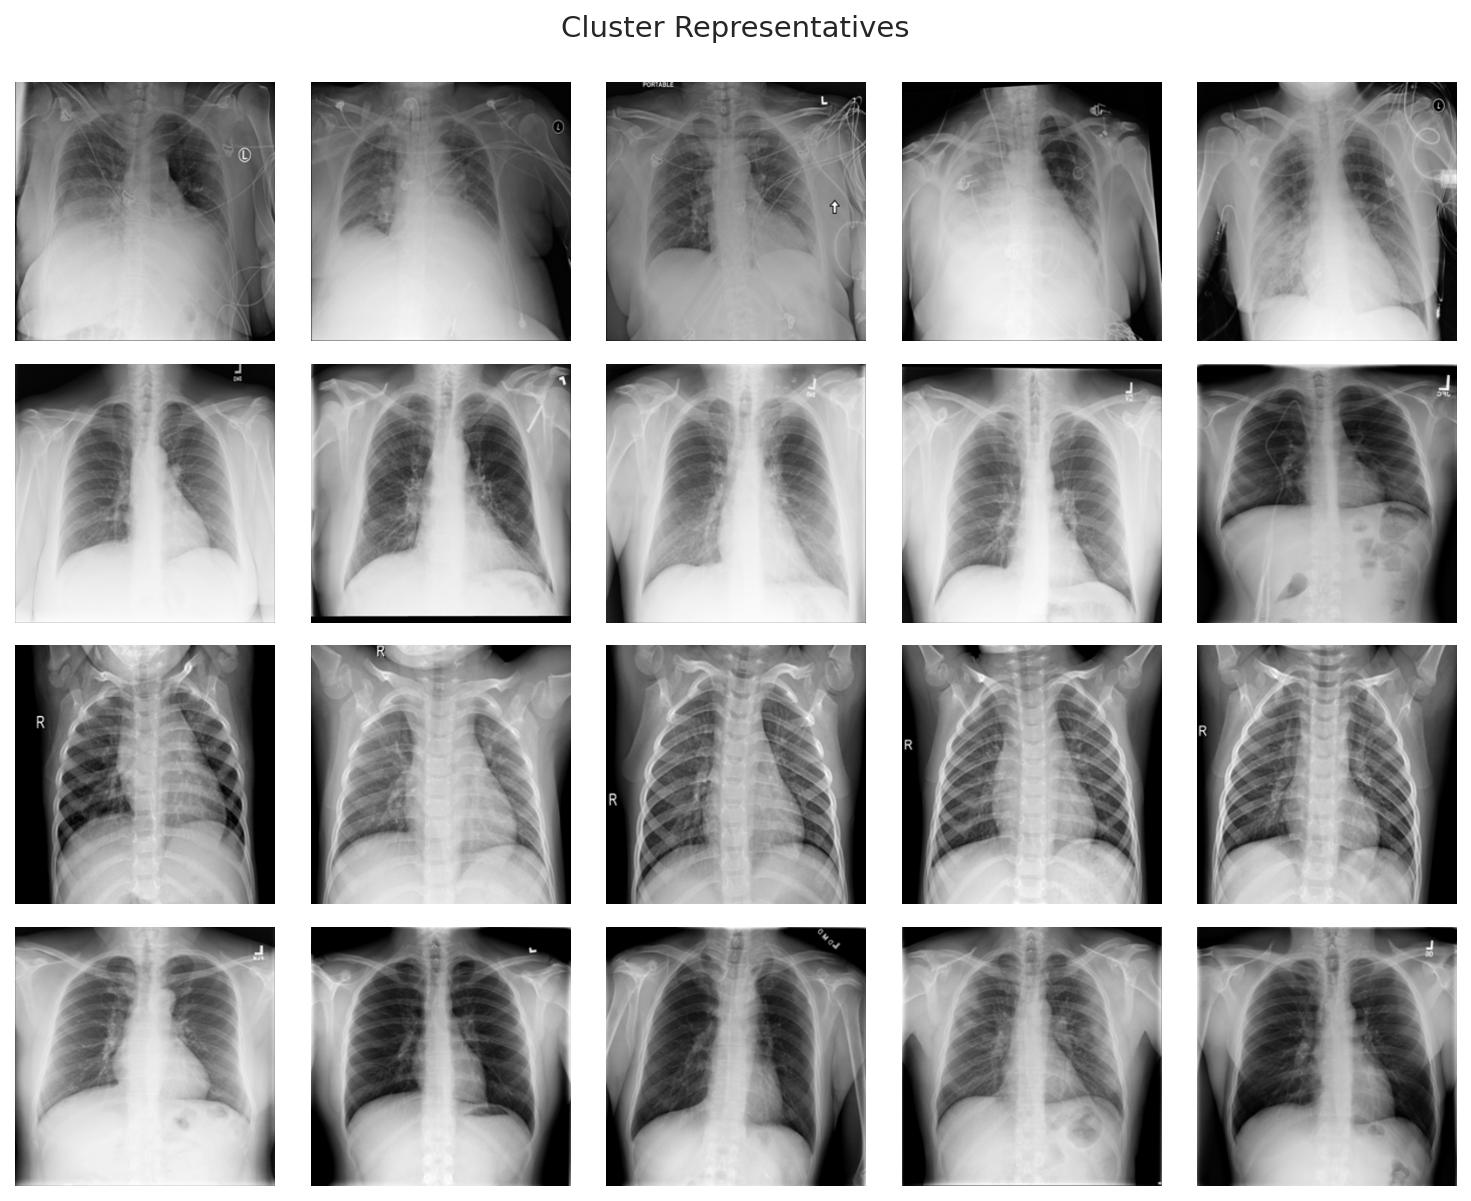

In [11]:
# Display key figures
from IPython.display import Image, display

figures_dir = Path(pipeline.output_dir) / "figures"

key_figures = [
    "class_distribution.png",
    "sample_grid_random.png",
    "image_mask_overlays.png",
    "pca_scree.png",
    "umap_scatter.png",
    "tsne_scatter.png",
    "inter_class_similarity.png",
    "cluster_representatives.png"
]

for fig_name in key_figures:
    fig_path = figures_dir / fig_name
    if fig_path.exists():
        print(f"\n{'='*60}")
        print(f"Figure: {fig_name}")
        print(f"{'='*60}")
        display(Image(filename=str(fig_path)))
    else:
        print(f"\nFigure not found: {fig_name}")

In [12]:
# Display key tables
tables_dir = Path(pipeline.output_dir) / "tables"

# Image statistics
stats_path = tables_dir / "image_stats.csv"
if stats_path.exists():
    df_stats = pd.read_csv(stats_path)
    print("Image Statistics (first 10 rows):")
    print("="*60)
    display(df_stats.head(10))

    print("\nSummary Statistics by Class:")
    print("="*60)
    display(df_stats.groupby('class')[['mean', 'std', 'width', 'height']].describe())

# Clustering results
clusters_path = tables_dir / "clusters.csv"
if clusters_path.exists():
    df_clusters = pd.read_csv(clusters_path)
    print("\nClustering Results (first 10 rows):")
    print("="*60)
    display(df_clusters.head(10))

Image Statistics (first 10 rows):


,filename,class,image_path,mask_path,has_mask,width,height,mode,format,size_bytes,mean,std,min,max,mask_area_fraction,masked_mean,masked_std
0,COVID-1.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,28209,145.896847,51.816632,0.0,255.0,0.234337,126.666014,28.027372
1,COVID-10.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,36458,141.355466,40.623291,0.0,227.0,0.262469,121.831025,23.117350
2,COVID-100.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,32856,152.878570,73.778044,0.0,255.0,0.230120,120.484227,41.486406
3,COVID-1000.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,33312,162.771054,76.249129,0.0,252.0,0.246015,135.185232,48.212477
4,COVID-1001.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,33337,129.890784,66.179559,0.0,242.0,0.148477,126.553413,30.032849
5,COVID-1002.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,36320,175.738761,56.926155,5.0,255.0,0.423933,129.561425,38.353111
6,COVID-1003.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,37586,160.755931,63.503526,0.0,255.0,0.317592,121.450674,31.928326
7,COVID-1004.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,26751,135.653997,56.232302,0.0,242.0,0.130412,112.887383,29.100692
8,COVID-1005.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,40117,140.919867,42.645260,11.0,226.0,0.396383,105.411068,36.312809
9,COVID-1006.png,COVID,/content/data/raw/COVID-19_Radiography_Dataset...,/content/data/raw/COVID-19_Radiography_Dataset...,True,299,299,L,PNG,38263,147.757654,41.569151,0.0,216.0,0.255098,132.542401,18.373822



Summary Statistics by Class:


mean                                                \
                   count        mean        std        min         25%   
class                                                                    
COVID             3616.0  139.521210  25.029784  25.511381  126.883094   
Lung_Opacity      6012.0  126.021596  23.570601  32.226899  110.578643   
Normal           10192.0  129.389800  22.448670  26.443597  113.520593   
Viral Pneumonia   1345.0  125.369630  18.980974  64.772698  113.497880   

                                                         std             ...  \
                        50%         75%         max    count       mean  ...   
class                                                                    ...   
COVID            142.594753  155.970733  216.561839   3616.0  54.647365  ...   
Lung_Opacity     120.819543  142.098830  229.141676   6012.0  57.397085  ...   
Normal           125.509709  143.643505  201.849543  10192.0  61.559355  ...   
Viral Pneumonia  126.860013  137.787776  193.691961   1345.0  58.745215  ...   

                 width          height                                   \
                   75%    max    count   mean  std    min    25%    50%   
class                                                                     
COVID            299.0  299.0   3616.0  299.0  0.0  299.0  299.0  299.0   
Lung_Opacity     299.0  299.0   6012.0  299.0  0.0  299.0  299.0  299.0   
Normal           299.0  299.0  10192.0  299.0  0.0  299.0  299.0  299.0   
Viral Pneumonia  299.0  299.0   1345.0  299.0  0.0  299.0  299.0  299.0   

                               
                   75%    max  
class                          
COVID            299.0  299.0  
Lung_Opacity     299.0  299.0  
Normal           299.0  299.0  
Viral Pneumonia  299.0  299.0  

[4 rows x 32 columns]


Clustering Results (first 10 rows):


,filename,true_label,kmeans_cluster,dbscan_cluster
0,COVID-1.png,COVID,0,-1
1,COVID-10.png,COVID,3,-1
2,COVID-100.png,COVID,1,-1
3,COVID-1000.png,COVID,1,-1
4,COVID-1001.png,COVID,0,-1
5,COVID-1002.png,COVID,1,-1
6,COVID-1003.png,COVID,3,-1
7,COVID-1004.png,COVID,1,-1
8,COVID-1005.png,COVID,3,-1
9,COVID-1006.png,COVID,1,-1


## 4. Conclusion

The complete EDA pipeline has been executed. All results are saved in the output directory:

- **figures/**: All visualizations (PNG files)
- **tables/**: Data tables (CSV files)
- **embeddings.npy**: Deep learning embeddings
- **summary.json**: Pipeline summary with metrics
- **log.txt**: Detailed execution log

### Next Steps:

1. Review the generated visualizations for insights
2. Examine the clustering results and similarity matrices
3. Use the embeddings for downstream tasks (classification, etc.)
4. Iterate on the analysis with different parameters

For questions or issues, please refer to the repository documentation.